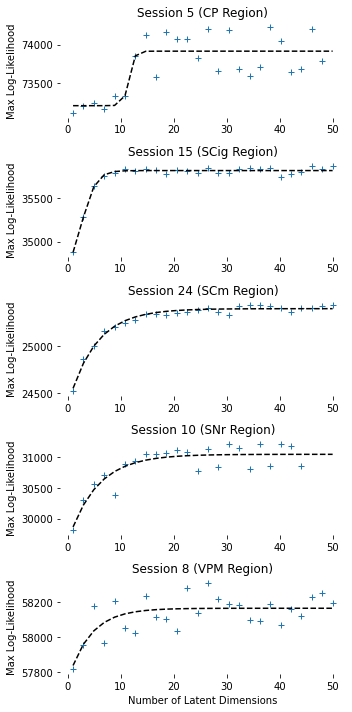

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

def sigmoidfit(xdata,ydata):
    p0 = [max(ydata), np.median(xdata),1,min(ydata)] # this is an mandatory initial guess
    popt, pcov = curve_fit(sigmoid, xdata, ydata, p0,maxfev = 3000)
    return popt

plt.figure(figsize=(5,10))
for n,i in enumerate(filter(lambda v: ".npy" in v,os.listdir())):
    plt.subplot(5,1,n+1)
    a = np.load(f"{i}",allow_pickle=True)
    a = a.item()
    values = np.array([temp[0] for temp in a['cv_ll_scores']])
    plt.plot(a['x_dims'],values,'+')
    opts = sigmoidfit(a['x_dims'][~np.isnan(values)],values[~np.isnan(values)])
    plt.plot(a['x_dims'],sigmoid(a['x_dims'],*opts),'k--')
    name = i.split('.')[0]
    plt.title(f"Session {name.split('_')[1]} ({name.split('_')[0]} Region)")
    plt.box(on=None)
    plt.ylabel("Max Log-Likelihood")
plt.xlabel("Number of Latent Dimensions")
plt.tight_layout()

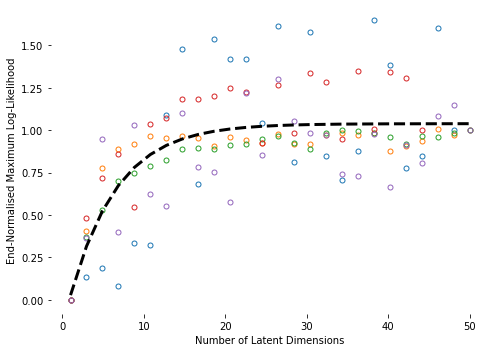

In [69]:
plt.figure(figsize=(7,5))
xys = []
for n,i in enumerate(filter(lambda v: ".npy" in v,os.listdir())):
    #plt.subplot(5,1,n+1)
    a = np.load(f"{i}",allow_pickle=True)
    a = a.item()
    values = np.array([temp[0] for temp in a['cv_ll_scores']])
    values = (values-values[0])/(values[~np.isnan(values)][-1]-values[0])
    plt.plot(a['x_dims'],values,'o', mfc='none',ms=5)
    xys.append([a['x_dims'],values])
xys = np.concatenate(xys,axis=1).T
order = np.argsort(xys[:,0])
plt.plot(xys[order,0],sigmoid(xys[order,0],*sigmoidfit(xys[:,0][~np.isnan(xys[:,1])],xys[:,1][~np.isnan(xys[:,1])])),'k--',linewidth=3)
plt.xlabel("Number of Latent Dimensions")
plt.ylabel("End-Normalised Maximum Log-Likelihood")
plt.box(on=None)
plt.tight_layout()